<a href="https://colab.research.google.com/github/meghna-panda/ElevateLabs-task8/blob/main/t8_clustering_with_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload your dataset (CSV)...


Saving Mall_Customers.csv to Mall_Customers.csv


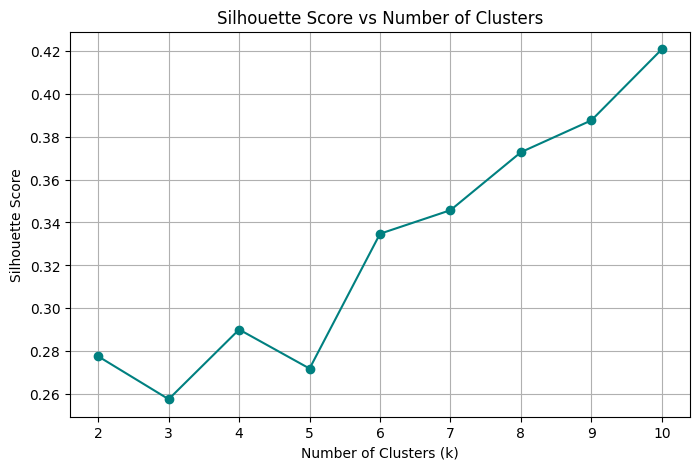

Best k: 10

Final Silhouette Score for k=10: 0.4208


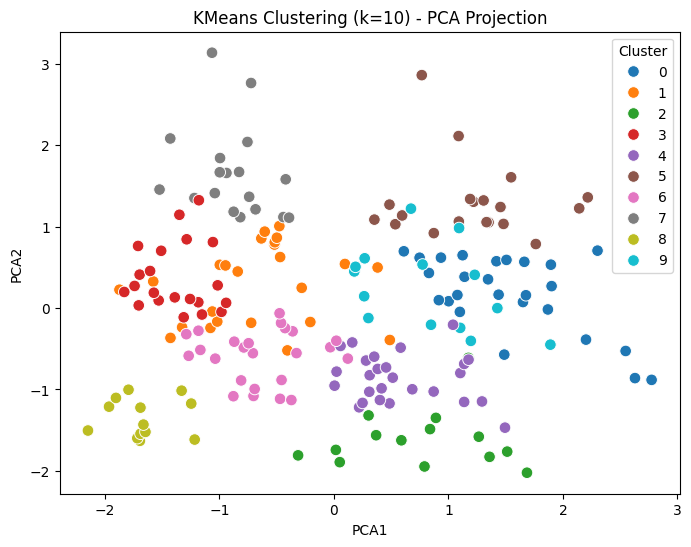

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from google.colab import files

print("Upload your dataset (CSV)...")
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

# Clean and preprocess
df.drop('CustomerID', axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)  # Gender to 0/1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

#Try different k values and record silhouette scores
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

#Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='teal')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

#Choose best k based on highest score (visually or via argmax)
best_k = K_range[np.argmax(silhouette_scores)]
print(f"Best k: {best_k}")

#Final KMeans model
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(scaled_data)
df['Cluster'] = labels

#Final silhouette score
final_score = silhouette_score(scaled_data, labels)
print(f"\nFinal Silhouette Score for k={best_k}: {final_score:.4f}")

#Visualize clusters with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = labels

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=70)
plt.title(f"KMeans Clustering (k={best_k}) - PCA Projection")
plt.show()
